# Clustering Music Genres

In this project, our goal is to utilize clustering techniques to effectively classify music genres into distinct clusters.

### Import Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')  

### Read Data

In [2]:
df=pd.read_csv('Spotify-2000.csv')

### Exploratory Data Analysis

In [3]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [4]:
df.drop(['Index'],axis=1,inplace=True)

In [5]:
df.shape

(1994, 14)

In [6]:
df['Artist'].unique()

array(['Norah Jones', 'Deep Purple', 'Gorillaz', 'Foo Fighters',
       'Bruce Springsteen', 'City To City', 'Maroon 5', 'Muse',
       'The Killers', 'Eminem', 'Elvis Presley', 'The White Stripes',
       'De Dijk', 'Ten Years After', 'Arctic Monkeys', 'Paul de Leeuw',
       'Coldplay', 'Alanis Morissette', 'John Miles', 'Justin Timberlake',
       'Mumford & Sons', 'Jan Smit', 'BLØF', 'Ilse DeLange', 'Editors',
       'Herbert Grönemeyer', "Youssou N'Dour", 'Robert Plant', 'Adele',
       'Amy Winehouse', 'Sandy Coast', 'The Goo Goo Dolls', 'U2',
       'Guus Meeuwis', 'Santa Esmeralda', 'Tiësto', 'Franz Ferdinand',
       'Green Day', 'Linkin Park', 'Robbie Williams', 'Lou Reed',
       'Snow Patrol', 'Barry White', 'Saybia', 'Pearl Jam', 'James Blunt',
       'Metallica', 'Christina Aguilera', 'Elbow', 'Beyoncé',
       'Backstreet Boys', 'Golden Earring', 'Rowwen Hèze', 'Johnny Cash',
       'Doe Maar', 'Manu Chao', '3 Doors Down', 'Seal', 'P!nk',
       'Status Quo', 'Stereophon

In [7]:
df['Top Genre'].value_counts()

Top Genre
album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
                    ... 
streektaal             1
indie anthem-folk      1
la pop                 1
ccm                    1
bebop                  1
Name: count, Length: 149, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   1994 non-null   object
 1   Artist                  1994 non-null   object
 2   Top Genre               1994 non-null   object
 3   Year                    1994 non-null   int64 
 4   Beats Per Minute (BPM)  1994 non-null   int64 
 5   Energy                  1994 non-null   int64 
 6   Danceability            1994 non-null   int64 
 7   Loudness (dB)           1994 non-null   int64 
 8   Liveness                1994 non-null   int64 
 9   Valence                 1994 non-null   int64 
 10  Length (Duration)       1994 non-null   object
 11  Acousticness            1994 non-null   int64 
 12  Speechiness             1994 non-null   int64 
 13  Popularity              1994 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 218.2+ KB


In [9]:
df.isnull().sum()

Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [10]:
df.describe()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


In [11]:
df.columns

Index(['Title', 'Artist', 'Top Genre', 'Year', 'Beats Per Minute (BPM)',
       'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence',
       'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')

### Data Visualization

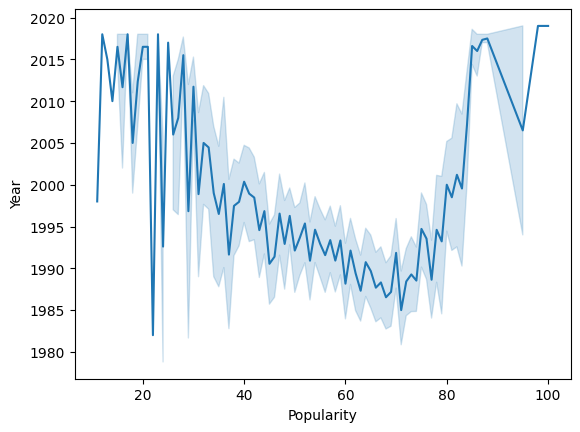

In [12]:
sns.lineplot(x='Popularity',y='Year',data=df);

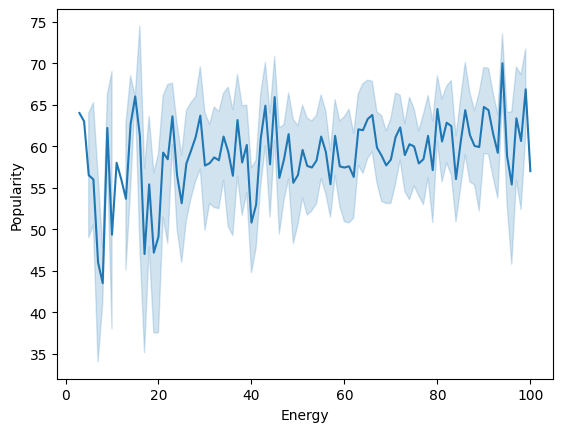

In [13]:
sns.lineplot(y='Popularity',x='Energy',data=df);

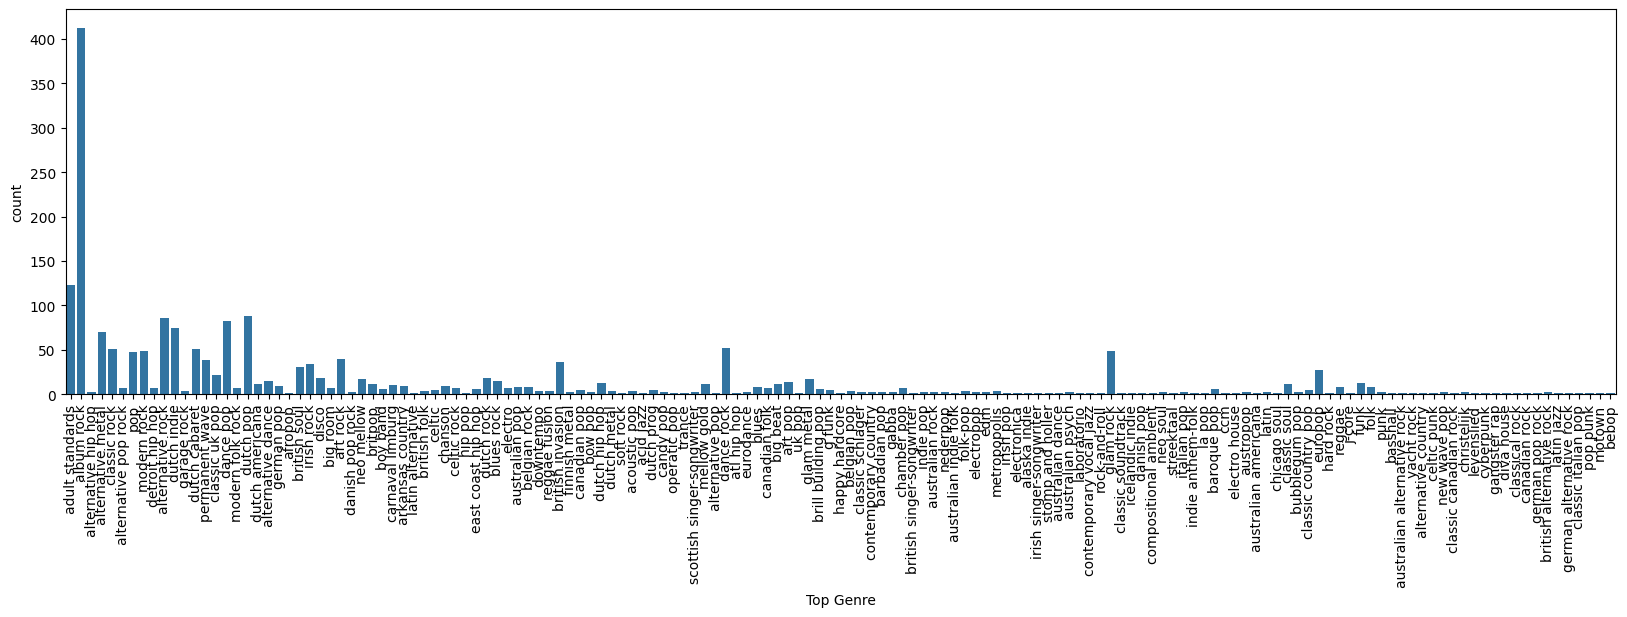

In [14]:
plt.figure(figsize=(20,5))
sns.countplot(x=df['Top Genre'])
plt.xticks(rotation=90);

In [15]:
top_30_artist=df.groupby(df['Artist'])['Popularity'].count().sort_values(ascending=False).head(30) 
top_30_artist

Artist
Queen                           37
The Beatles                     36
Coldplay                        27
U2                              26
The Rolling Stones              24
Michael Jackson                 23
Bruce Springsteen               23
ABBA                            22
David Bowie                     21
Fleetwood Mac                   18
BLØF                            17
Elvis Presley                   17
George Michael                  16
Marco Borsato                   15
Muse                            15
Adele                           14
Dire Straits                    14
Pink Floyd                      13
Anouk                           13
De Dijk                         13
Creedence Clearwater Revival    13
Eagles                          12
Bee Gees                        12
Ed Sheeran                      12
Prince                          12
Golden Earring                  12
Elton John                      11
Metallica                       11
Nirvana      

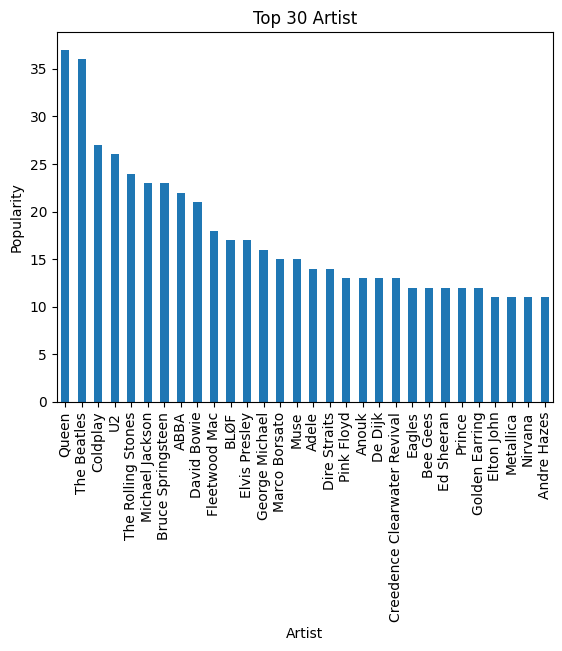

In [16]:
top_30_artist.plot(kind='bar')
plt.ylabel('Popularity')
plt.title('Top 30 Artist')
plt.xticks(rotation=90);

### Clustering

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage

In [18]:
x=df.drop(['Title', 'Artist', 'Top Genre','Length (Duration)'],axis=1)

In [19]:
model=KMeans(4)  

In [20]:
model=model.fit(x)  

In [21]:
prediction=model.predict(x)

In [22]:
prediction

array([1, 2, 3, ..., 2, 3, 1])

In [23]:
x['cluster']=prediction

In [24]:
x.sample(5)

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity,cluster
1762,1998,133,80,52,-6,61,63,0,3,58,2
1095,1978,93,72,53,-10,8,76,13,3,51,2
1282,1984,117,34,65,-12,7,39,49,4,58,1
873,1971,131,50,42,-13,20,66,48,3,39,1
923,1973,85,60,27,-10,19,29,2,4,41,0


In [25]:
silhouette_score(x,prediction)  

0.18385435908923034

In [26]:
wcss=[]   #Within-Cluster Sum of Squares
ss=[]     #Silhouette Score
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    prediction=model.predict(x)
    ssl=silhouette_score(x,prediction)
    ss.append(ssl)
    print(f"Number of clusters = {i}, Silhouette score: {ssl}")
    wcss.append(model.inertia_)

Number of clusters = 2, Silhouette score: 0.249710078342818
Number of clusters = 3, Silhouette score: 0.1954321934500388
Number of clusters = 4, Silhouette score: 0.18385435908923034
Number of clusters = 5, Silhouette score: 0.17038942262417323
Number of clusters = 6, Silhouette score: 0.16919220754188227
Number of clusters = 7, Silhouette score: 0.14060961576965508
Number of clusters = 8, Silhouette score: 0.1472528748879991
Number of clusters = 9, Silhouette score: 0.15740746284066462


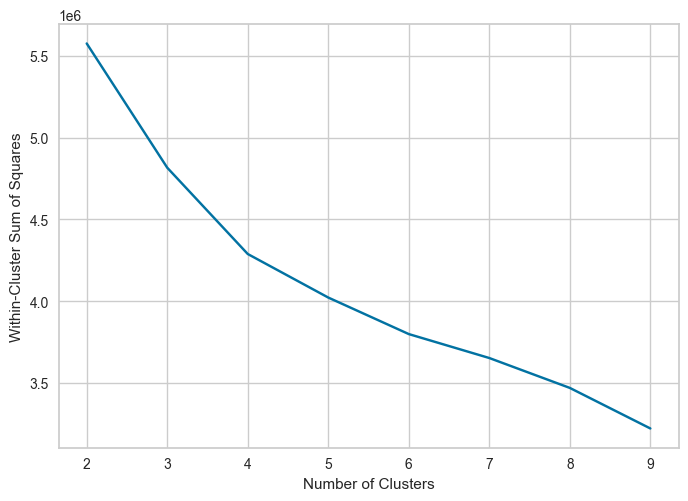

In [27]:
plt.plot(range(2,10),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares');  

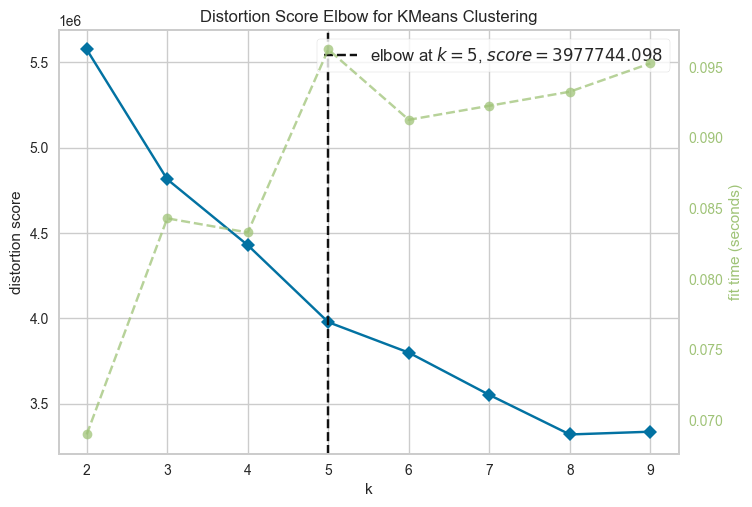

In [28]:
km=KMeans()
vis=KElbowVisualizer(km, k=(2,10))
vis.fit(x)
vis.show();

In [29]:
data=linkage(x,method='ward',metric='euclidean')

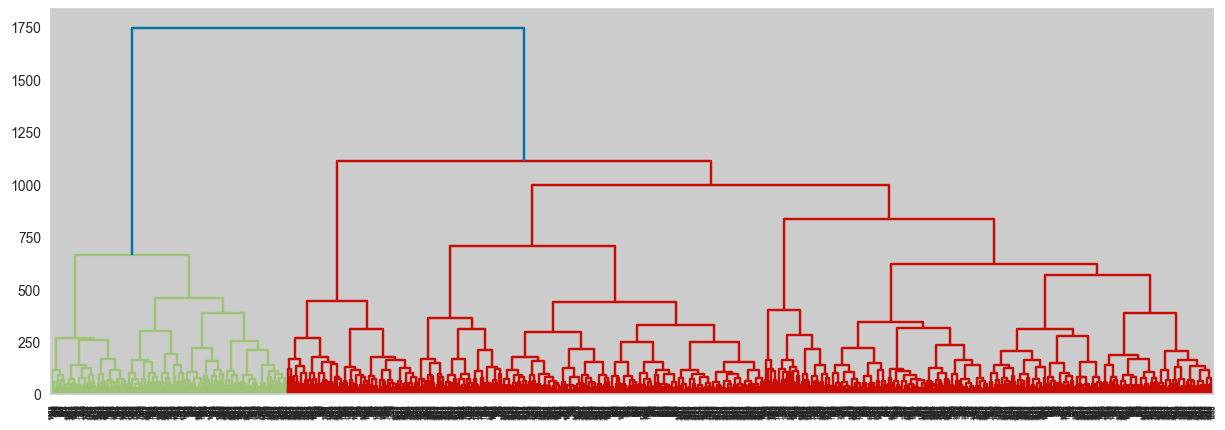

In [30]:
plt.figure(figsize=(15,5))
dendrogram(data);

In [31]:
x['Top Genre']=df['Top Genre']
x['Artist']=df['Artist']

In [32]:
x[x['cluster']==0]

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity,cluster,Top Genre,Artist
5,2004,99,46,54,-9,14,14,0,2,45,0,alternative pop rock,City To City
6,2002,102,71,71,-6,13,54,6,3,74,0,pop,Maroon 5
11,2003,124,46,74,-8,26,32,1,8,74,0,alternative rock,The White Stripes
12,2000,102,88,54,-6,53,59,2,3,34,0,dutch indie,De Dijk
13,2005,117,93,38,-2,81,40,18,10,26,0,album rock,Ten Years After
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,1969,91,46,55,-9,10,54,34,3,60,0,blues,B.B. King
1973,1969,87,55,27,-10,10,43,4,5,63,0,album rock,Led Zeppelin
1974,1969,118,62,48,-10,14,19,6,3,43,0,album rock,The Who
1980,1969,89,55,38,-9,31,25,4,3,36,0,dutch prog,Brainbox


In [33]:
x[x['cluster']==1]

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity,cluster,Top Genre,Artist
0,2004,157,30,53,-14,11,68,94,3,71,1,adult standards,Norah Jones
10,2002,109,5,44,-16,11,31,88,4,49,1,adult standards,Elvis Presley
15,2006,133,42,42,-10,16,25,84,4,48,1,dutch cabaret,Paul de Leeuw
19,2002,74,65,62,-7,10,56,57,18,74,1,dance pop,Justin Timberlake
25,2008,130,48,55,-8,10,18,48,3,50,1,dutch americana,Ilse DeLange
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,1969,154,36,45,-13,20,30,47,4,67,1,album rock,"Crosby, Stills & Nash"
1987,1958,119,24,75,-15,9,43,83,12,68,1,adult standards,Nina Simone
1988,1958,168,7,17,-21,14,10,92,3,66,1,adult standards,Louis Armstrong
1989,1958,94,21,70,-12,11,72,84,7,63,1,adult standards,Elvis Presley


In [34]:
x[x['cluster']==2]

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity,cluster,Top Genre,Artist
1,2000,135,79,50,-11,17,81,17,7,39,2,album rock,Deep Purple
4,2002,106,82,58,-5,10,87,1,3,59,2,classic rock,Bruce Springsteen
9,2002,112,67,91,-3,24,66,0,7,82,2,detroit hip hop,Eminem
14,2007,112,81,65,-5,14,82,0,3,66,2,garage rock,Arctic Monkeys
22,2006,96,89,63,-6,9,81,5,3,55,2,dutch pop,Jan Smit
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,1969,109,90,43,-5,12,77,41,7,68,2,album rock,The Doors
1982,1969,127,87,41,-6,83,65,0,4,45,2,blues rock,Rare Earth
1985,1956,95,66,56,-8,14,96,65,6,62,2,adult standards,Elvis Presley
1986,1958,167,58,65,-10,7,92,41,8,73,2,adult standards,Elvis Presley


In [35]:
x[x['cluster']==3]

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity,cluster,Top Genre,Artist
2,2001,168,69,66,-9,7,52,2,17,69,3,alternative hip hop,Gorillaz
3,2007,173,96,43,-4,3,37,0,4,76,3,alternative metal,Foo Fighters
7,2006,137,96,37,-5,12,21,0,14,69,3,modern rock,Muse
8,2004,148,92,36,-4,10,23,0,8,77,3,modern rock,The Killers
20,2005,138,42,21,-9,11,12,16,3,81,3,permanent wave,Coldplay
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,1969,134,34,40,-11,14,38,20,3,72,3,british invasion,The Beatles
1964,1969,182,50,40,-11,13,82,39,8,61,3,adult standards,Dusty Springfield
1977,1969,197,71,31,-9,26,67,0,10,34,3,dutch indie,Cuby & The Blizzards
1990,1958,175,76,36,-8,76,95,73,6,69,3,adult standards,Elvis Presley


In [36]:
x[x['cluster']==3]['Top Genre'].unique()

array(['alternative hip hop', 'alternative metal', 'modern rock',
       'permanent wave', 'modern folk rock', 'afropop', 'album rock',
       'alternative rock', 'irish rock', 'dance pop', 'dutch pop',
       'latin alternative', 'danish pop rock', 'british folk', 'celtic',
       'britpop', 'dutch indie', 'carnaval limburg', 'classic rock',
       'dutch cabaret', 'neo mellow', 'detroit hip hop', 'british soul',
       'disco', 'dutch hip hop', 'dutch prog', 'trance', 'art rock',
       'belgian rock', 'blues rock', 'pop', 'alternative pop',
       'german pop', 'east coast hip hop', 'alternative dance',
       'alternative pop rock', 'eurodance', 'mellow gold', 'art pop',
       'garage rock', 'happy hardcore', 'barbadian pop', 'gabba',
       'electro', 'chamber pop', 'celtic rock', 'laboratorio',
       'adult standards', 'icelandic indie', 'dance rock', 'metropopolis',
       'neo soul', 'la pop', 'electro house', 'canadian pop', 'latin',
       'classic uk pop', 'classic soul', 

In [37]:
x[x['cluster']==0]['Top Genre'].unique()

array(['alternative pop rock', 'pop', 'alternative rock', 'dutch indie',
       'album rock', 'permanent wave', 'classic uk pop', 'dutch pop',
       'alternative dance', 'british soul', 'big room',
       'alternative metal', 'irish rock', 'danish pop rock', 'dance pop',
       'boy band', 'carnaval limburg', 'arkansas country', 'britpop',
       'dutch cabaret', 'dutch rock', 'modern rock', 'blues rock',
       'australian pop', 'downtempo', 'finnish metal', 'neo mellow',
       'celtic rock', 'dutch metal', 'soft rock', 'acoustic pop',
       'acid jazz', 'candy pop', 'detroit hip hop', 'dutch prog',
       'scottish singer-songwriter', 'dutch americana', 'classic rock',
       'belgian rock', 'mellow gold', 'big beat', 'british invasion',
       'art rock', 'electro', 'g funk', 'classic schlager',
       'contemporary country', 'brill building pop', 'chanson',
       'british singer-songwriter', 'modern folk rock', 'barbadian pop',
       'folk-pop', 'electropop', 'belgian pop', 'g

When comparing the four clusters of music genres, we can make the following observations:

Cluster 0: This cluster is dominated by alternative music genres. It includes genres such as alternative hip hop, alternative metal, and alternative rock. Additionally, it features pop, dance pop, and electronic music genres.

Cluster 1: This cluster primarily consists of classic rock genres like classic rock, glam rock, and hard rock. It also includes funk, reggae, and disco, which are danceable music genres.

Cluster 2: In this cluster, various pop genres, neo mellow, and adult standards are prominent. It also represents genres like folk and country pop. The focus is on mellower and melodic music styles.

Cluster 3: This cluster encompasses modern rock, alternative rock, and album rock genres. Additionally, it includes dance pop, electronic music, and disco, which are suitable for dancing.